## Clément Vinot

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

scaler = StandardScaler()

In [ ]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
scaler.fit(X)
X = scaler.transform(X)
labels = data.iloc[:, 0].values

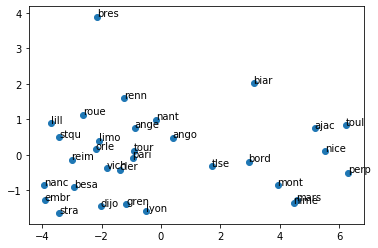

[0.87268193 0.11720602]


In [3]:
# PCA villes : 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

print(pca.explained_variance_ratio_)

## Nbr d'axes à retenir
Avec deux axes on est déjà à 99% d'information conservée. Donc deux axes suffisent.

In [25]:
print(pca.components_)

[[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]]


## interprétation des deux premiers axes principaux 

Premier axe : les poids sont quasiment tous égaux : il s'agit d'une moyenne des températures sur l'année.
Second axe : les poids sont opposés entre été et hiver : il s'agit d'une variation des extrêmes de températures d'été à hiver.

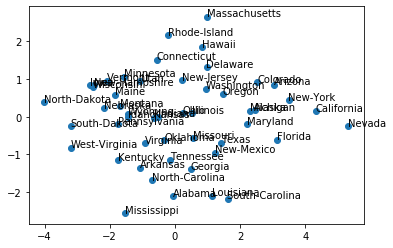

[0.58785136 0.17696026 0.10368809 0.04520458]


In [29]:
# PCA crimes :

data = pd.read_csv('./crimes.csv', sep=';')
X = data.iloc[:, 1:13].values
scaler.fit(X)
X = scaler.transform(X)
labels = data.iloc[:, 0].values

pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

print(pca.explained_variance_ratio_)

In [30]:
print(pca.components_)

[[ 0.30027916  0.43175936  0.39687549  0.3966517   0.44015721  0.35735953
   0.29517681]
 [-0.62917444 -0.16943512  0.04224698 -0.34352815  0.20334059  0.40231912
   0.50242093]
 [ 0.1782453  -0.24419758  0.49586087 -0.06950972 -0.20989509 -0.53923144
   0.56838373]
 [-0.23211411  0.06221567 -0.55798926  0.62980445 -0.05755491 -0.23488987
   0.41923832]]


## Nbr d'axes à retenir
Avec quatre axes on est déjà à 90.6% d'information conservée. Donc quatre axes suffisent.

## interprétation des deux premiers axes principaux 
Premier axe : moyenne <br>
Le second  classifie la proportion entre deux classes de crime à chaque fois : <br>
Negatif => beaucoup de meurtre attaque enlèvement , Positif => Viol, larcin, vol de voiture

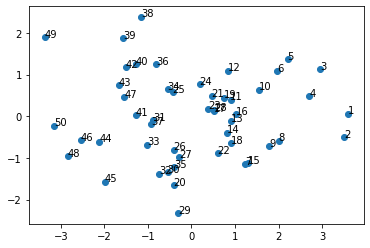

[0.66804393 0.25484695]


In [27]:
# PCA startup :

data = pd.read_csv('./50_Startups.csv', sep=';')
X = data.iloc[:, 1:13].values
scaler.fit(X)
X = scaler.transform(X)
labels = data.iloc[:, 0].values

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

print(pca.explained_variance_ratio_)

In [28]:
print(pca.components_)

[[ 0.59347855  0.14737886  0.52064694  0.59580992]
 [-0.04048087 -0.95051314  0.30797098  0.00632069]]


## Nbr d'axes à retenir
Avec quatre axes on est déjà à 90.6% d'information conservée. Donc quatre axes suffisent.

## interprétation des deux premiers axes principaux 
Premier axe : moyenne entre les valeurs sans prendre en compte la dépense administrative <br>
Deuxième axe : discrimination par le rapport entre les dépenses administratives et les dépenses marketing

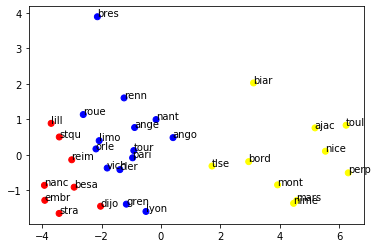

In [21]:
from sklearn.cluster import KMeans
import matplotlib

data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
scaler.fit(X)
X = scaler.transform(X)
labels = data.iloc[:, 0].values

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pca)
clustering = kmeans.labels_

colors = ['red','yellow','blue']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

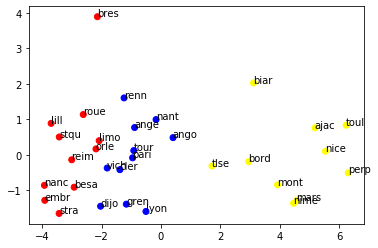

In [22]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3).fit(X_pca)

clustering = clustering.labels_

colors = ['red','yellow','blue']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [23]:
from sklearn import metrics
for i in np.arange(2, 6):
 clustering = KMeans(n_clusters=i).fit_predict(X_pca)
 print(metrics.silhouette_score(X_pca, clustering,metric='euclidean'))
 print()

0.6341345030494504

0.40123525587485687

0.39640728752208265

0.33728945300545154



## Interpretation
On a une perte d'information importante en passant de 2 à 3 clusters. Choisir 2 classes permet donc de maximiser la qualité du clustering. 